In [1]:
import tensorflow 
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
from matplotlib.image import imread

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

import sys
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from IPython.display import display
from PIL import Image

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import random 
from tensorflow.keras import models
from tensorflow.keras import backend as K

import pandas as pd

from tensorflow.keras.applications import VGG16, Xception, ResNet50, ResNet101, InceptionResNetV2, DenseNet201

In [2]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128

In [4]:
#Write the local Data and Model Path
DATA_PATH = 'C:\\Users\\pacol\\Desktop\\GIT\\COVID19\\data\\'
MODEL_PATH = 'C:\\Users\\pacol\\Desktop\\GIT\\COVID19\\data\\'

# Data Generator

In [5]:
def data_generator(batch_size):
    train_datagen = ImageDataGenerator(rescale = 1./255)
    val_datagen = ImageDataGenerator(rescale = 1./255)
    test_datagen = ImageDataGenerator(rescale = 1./255)

    BATCH_SIZE = batch_size
    IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

    train_dir = DATA_PATH + 'Sorted Data\\train'
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = IMAGE_SIZE,
        batch_size = BATCH_SIZE,
        shuffle = True,
        class_mode = 'categorical'
    )

    test_dir = DATA_PATH + 'Sorted Data\\test'
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = IMAGE_SIZE,
        batch_size = BATCH_SIZE,
        shuffle = True,
        class_mode = 'categorical'
    )

    val_dir = DATA_PATH + 'Sorted Data\\val'
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size = IMAGE_SIZE,
        batch_size = BATCH_SIZE,
        shuffle = True,
        class_mode = 'categorical'
    )
    return train_generator, test_generator, val_generator


# Create CNN

In [16]:
def build_model(model_name):

    if model_name== '1':
        model = Sequential()
      
        model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
        model1.add(BatchNormalization())
        model1.add(MaxPooling2D((2, 2)))
        model1.add(Dropout(0.2))

        model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model1.add(BatchNormalization())
        model1.add(MaxPooling2D((2, 2)))
        model1.add(Dropout(0.2))

        model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model1.add(BatchNormalization())
        model1.add(MaxPooling2D((2, 2)))
        model1.add(Dropout(0.2))

        model1.add(Flatten())
        model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
        model1.add(BatchNormalization())
        model1.add(Dropout(0.5))
        model1.add(Dense(3, activation='softmax'))   
        return model1


    if model_name == 'VGG16':

        conv_base = VGG16(weights=None,include_top=False, input_tensor=None, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3), pooling='avg',classes=3)

        modelVGG16 = Sequential()
        modelVGG16.add(conv_base)

        modelVGG16.add(Flatten())
        modelVGG16.add(Dense(512, activation='relu'))
        modelVGG16.add(BatchNormalization())
        modelVGG16.add(Dropout(0.5))
        modelVGG16.add(Dense(3, activation='softmax')) 
        return modelVGG16 

    if model_name == 'Xception':


        conv_base2 = Xception(include_top=False, weights=None, input_tensor=None, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3), pooling='avg')

        modelXception = Sequential()
        modelXception.add(conv_base2)

        modelXception.add(Flatten())
        modelXception.add(Dense(512, activation='relu'))
        modelXception.add(BatchNormalization())
        modelXception.add(Dropout(0.5))
        modelXception.add(Dense(3, activation='softmax')) 
        return modelXception

    if model_name == 'ResNet50':

        conv_base3 = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3), pooling=None, classes=3)

        modelResNet50 = Sequential()
        modelResNet50.add(conv_base3)

        modelResNet50.add(Flatten())
        modelResNet50.add(Dense(512, activation='relu'))
        modelResNet50.add(BatchNormalization())
        modelResNet50.add(Dropout(0.5))
        modelResNet50.add(Dense(3, activation='softmax')) 
        return modelResNet50
    
    if model_name == 'ResNet101':

        conv_base4 = ResNet101(include_top=False, weights=None, input_tensor=None, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3), pooling=None, classes=3)

        modelResNet101 = Sequential()
        modelResNet101.add(conv_base4)

        modelResNet101.add(Flatten())
        modelResNet101.add(Dense(512, activation='relu'))
        modelResNet101.add(BatchNormalization())
        modelResNet101.add(Dropout(0.5))
        modelResNet101.add(Dense(3, activation='softmax')) 
        return modelResNet101

    if model_name == 'InceptionResNetV2':

        conv_base5 = InceptionResNetV2(include_top=False, weights=None, input_tensor=None, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3), pooling=None, classes=3)

        modelInception = Sequential()
        modelInception.add(conv_base5)

        modelInception.add(Flatten())
        modelInception.add(Dense(512, activation='relu'))
        modelInception.add(BatchNormalization())
        modelInception.add(Dropout(0.5))
        modelInception.add(Dense(3, activation='softmax')) 
        return modelInception


In [17]:
def model_evaluate(model_name,optimizer,epochs,batch_size, loss = 'categorical_crossentropy', plot=True):    

    train_generator, test_generator, val_generator = data_generator(batch_size)



    model = build_model(model_name)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()

    os.chdir(MODEL_PATH)

    checkpoint = ModelCheckpoint('model_{}_epochs_{}_optimizer_SGD_batch_{}.h5'.format(model_name,epochs,batch_size), 
                                 monitor='val_accuracy', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 save_weights_only=False, 
                                 mode='auto', 
                                 period=1)

    callbacks_list = [checkpoint]

    hist=model.fit(train_generator,
                            epochs=epochs,
                            verbose=1,
                            shuffle=True,
                            steps_per_epoch = 2560 / batch_size,
                            validation_data = val_generator,
                            callbacks=callbacks_list)
    if(plot):
        print("------------Epochs: {}------------".format(epochs))
        #Visualize the models accuracy
        plt.plot(hist.history['accuracy'])
        plt.plot(hist.history['val_accuracy'])
        plt.title('Accuracy {}'.format(model.name))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()

        #Visualize the models loss
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        plt.title('Loss {}'.format(model.name))
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()
    

    loss_train = hist.history['loss'][-1]
    acc_train = hist.history['accuracy'][-1]
    loss_val = hist.history['val_loss'][-1]
    acc_val = hist.history['val_accuracy'][-1]

    print("Loss-> Train Set:{:.2f}; Val Set:{:.2f} (Diff: {:2f})".format(loss_train,loss_val,abs(loss_train-loss_val)))
    print("Accuracy-> Train Set:{:.2f}; Val Set:{:.2f} (Diff: {:2f})".format(acc_train,acc_val,abs(acc_train-acc_val)))
    
    predict = model.evaluate_generator(test_generator)
    
    
    return loss_train, acc_train, loss_val, acc_val, predict[0], predict[1]
    

In [18]:
opt=tensorflow.keras.optimizers.SGD(learning_rate=0.003, momentum=0.9)
epoch = 20
batch_size = 32

In [9]:
results = pd.DataFrame(columns=['Model','Optimizer','epochs','batch_sizes','loss_train', 'acc_train', 'loss_val', 'acc_val'])
results_test = pd.DataFrame(columns=['Model', 'Loss','Accuracy'])


# VGG16

Found 2560 images belonging to 3 classes.
Found 800 images belonging to 3 classes.
Found 640 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539     

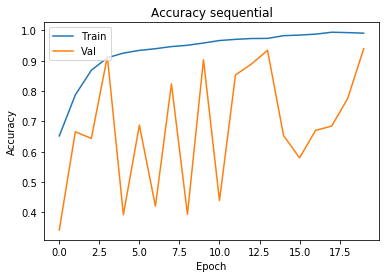

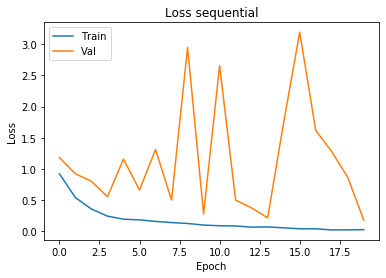

Loss-> Train Set:0.03; Val Set:0.18 (Diff: 0.150493)
Accuracy-> Train Set:0.99; Val Set:0.94 (Diff: 0.051563)


,Model,Loss,Accuracy
0,VGG16,0.15123,0.95625


In [10]:
model_name = 'VGG16'
loss_train, acc_train, loss_val, acc_val, loss_test, acc_test = model_evaluate(model_name=model_name,optimizer=opt,epochs=epoch,batch_size=batch_size, plot=True)
results = results.append({'Model':model_name,'Optimizer':'SGD','epochs':epoch,'batch_sizes':batch_size,'loss_train':loss_train, 'acc_train':acc_train, 'loss_val':loss_val, 'acc_val':acc_val},ignore_index=True)
results_test = results_test.append({'Model':model_name,'Loss':loss_test,'Accuracy':acc_test},ignore_index=True)
results
results_test

# Xception

Found 2560 images belonging to 3 classes.
Found 800 images belonging to 3 classes.
Found 640 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539   

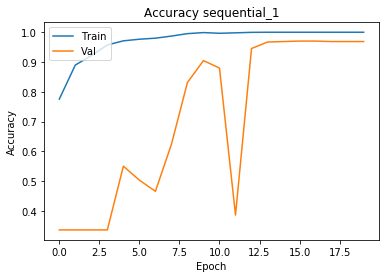

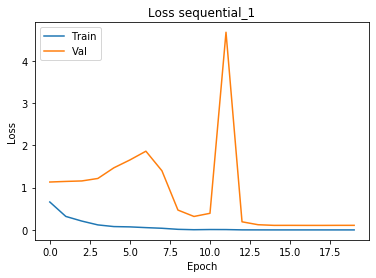

Loss-> Train Set:0.00; Val Set:0.11 (Diff: 0.108301)
Accuracy-> Train Set:1.00; Val Set:0.97 (Diff: 0.031250)


,Model,Loss,Accuracy
0,VGG16,0.151230,0.95625
1,Xception,0.120789,0.97375


In [11]:
model_name = 'Xception'
loss_train, acc_train, loss_val, acc_val, loss_test, acc_test = model_evaluate(model_name=model_name,optimizer=opt,epochs=epoch,batch_size=batch_size, plot=True)
results = results.append({'Model':model_name,'Optimizer':'SGD','epochs':epoch,'batch_sizes':batch_size,'loss_train':loss_train, 'acc_train':acc_train, 'loss_val':loss_val, 'acc_val':acc_val},ignore_index=True)
results_test = results_test.append({'Model':model_name,'Loss':loss_test,'Accuracy':acc_test},ignore_index=True)
results
results_test

# ResNet50

Found 2560 images belonging to 3 classes.
Found 800 images belonging to 3 classes.
Found 640 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16777728  
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 1539   

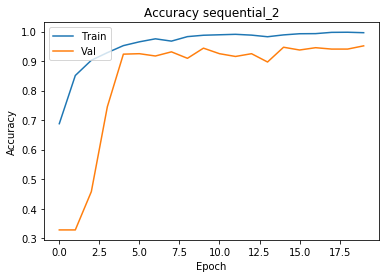

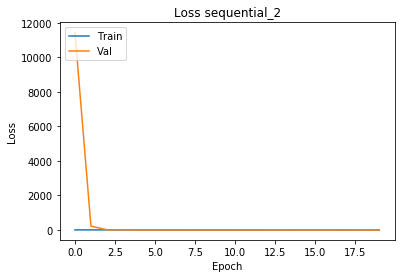

Loss-> Train Set:0.02; Val Set:0.22 (Diff: 0.199351)
Accuracy-> Train Set:1.00; Val Set:0.95 (Diff: 0.044531)


,Model,Loss,Accuracy
0,VGG16,0.151230,0.95625
1,Xception,0.120789,0.97375
2,ResNet50,0.171454,0.95875


In [12]:
model_name = 'ResNet50'
loss_train, acc_train, loss_val, acc_val, loss_test, acc_test = model_evaluate(model_name=model_name,optimizer=opt,epochs=epoch,batch_size=batch_size, plot=True)
results = results.append({'Model':model_name,'Optimizer':'SGD','epochs':epoch,'batch_sizes':batch_size,'loss_train':loss_train, 'acc_train':acc_train, 'loss_val':loss_val, 'acc_val':acc_val},ignore_index=True)
results_test = results_test.append({'Model':model_name,'Loss':loss_test,'Accuracy':acc_test},ignore_index=True)
results
results_test

Found 2560 images belonging to 3 classes.
Found 800 images belonging to 3 classes.
Found 640 images belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Model)            (None, 4, 4, 2048)        42658176  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               16777728  
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 1539   

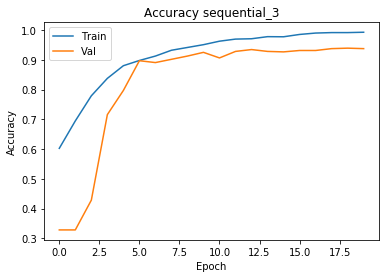

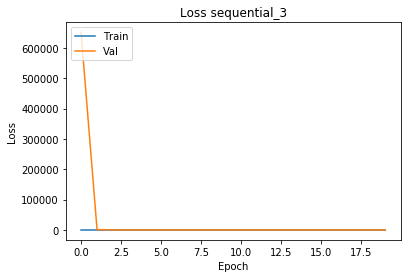

Loss-> Train Set:0.03; Val Set:0.36 (Diff: 0.327171)
Accuracy-> Train Set:0.99; Val Set:0.94 (Diff: 0.055078)


In [19]:
model_name = 'ResNet101'
loss_train, acc_train, loss_val, acc_val, loss_test, acc_test = model_evaluate(model_name=model_name,optimizer=opt,epochs=epoch,batch_size=batch_size, plot=True)
results = results.append({'Model':model_name,'Optimizer':'SGD','epochs':epoch,'batch_sizes':batch_size,'loss_train':loss_train, 'acc_train':acc_train, 'loss_val':loss_val, 'acc_val':acc_val},ignore_index=True)
results_test = results_test.append({'Model':model_name,'Loss':loss_test,'Accuracy':acc_test},ignore_index=True)

Found 2560 images belonging to 3 classes.
Found 800 images belonging to 3 classes.
Found 640 images belonging to 3 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 2, 2, 1536)        54336736  
_________________________________________________________________
flatten_4 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               3146240   
_________________________________________________________________
batch_normalization_211 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 1539   

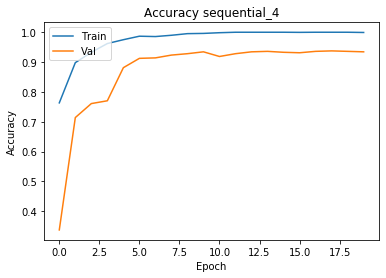

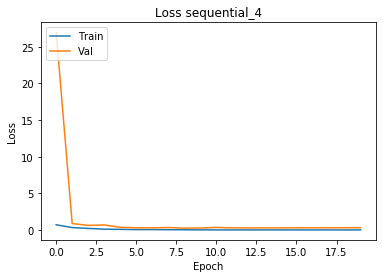

Loss-> Train Set:0.00; Val Set:0.31 (Diff: 0.305593)
Accuracy-> Train Set:1.00; Val Set:0.93 (Diff: 0.064844)


In [20]:
model_name = 'InceptionResNetV2'
loss_train, acc_train, loss_val, acc_val, loss_test, acc_test = model_evaluate(model_name=model_name,optimizer=opt,epochs=epoch,batch_size=batch_size, plot=True)
results = results.append({'Model':model_name,'Optimizer':'SGD','epochs':epoch,'batch_sizes':batch_size,'loss_train':loss_train, 'acc_train':acc_train, 'loss_val':loss_val, 'acc_val':acc_val},ignore_index=True)
results_test = results_test.append({'Model':model_name,'Loss':loss_test,'Accuracy':acc_test},ignore_index=True)

In [25]:
results

,Model,Optimizer,epochs,batch_sizes,loss_train,acc_train,loss_val,acc_val
0,VGG16,SGD,20,32,0.027855,0.990625,0.178349,0.939062
1,Xception,SGD,20,32,0.000119,1.000000,0.108421,0.968750
2,ResNet50,SGD,20,32,0.023741,0.996094,0.223092,0.951563
3,ResNet101,SGD,20,32,0.029845,0.992578,0.357016,0.937500
4,InceptionResNetV2,SGD,20,32,0.001003,0.999219,0.306596,0.934375


In [22]:
results_test

,Model,Loss,Accuracy
0,VGG16,0.151230,0.95625
1,Xception,0.120789,0.97375
2,ResNet50,0.171454,0.95875
3,ResNet101,0.248076,0.95000
4,InceptionResNetV2,0.211448,0.96125
